In [47]:
import json

In [48]:
def get_friendly_name(param_name):
    return param_name.split(".")[-2]

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import defaultdict
import os

def plot_function(base_string, title, max_time=5, d_models=[256, 512, 1024, 2048], n_heads=[16]):

    
    fig, axs = plt.subplots(nrows=1, ncols=max_time - 1, figsize=(8 * max_time, 8))
    for ax, time_step in zip(axs, range(max_time)):
        print(ax)
        per_layer_activations = defaultdict(list)

        for d_model in d_models:
            for n_head in n_heads:
                activation_json_file = os.path.join(base_string.format(d_model, n_head), f"batch_{time_step}.json")

               # Open the JSON file
                with open(activation_json_file) as f:
                    data = json.load(f) 
                    # print(data)
                    for param_name, val in data.items():
                        per_layer_activations[param_name].append(val)
        print(per_layer_activations)
    

        ax.set_title(title.format(time_step))
        cmap  = cm.get_cmap('viridis', len(per_layer_activations))
        for i, (param_name, scaled_versions) in enumerate(per_layer_activations.items()):
            if i == 0:
                continue
            ax.plot(d_models, scaled_versions, label=get_friendly_name(param_name), c=cmap(i))
        ax.set_xlabel("d_model")
        ax.set_ylabel("L1 Norm")
        ax.loglog(base=2)
    axs[0].legend()

Axes(0.125,0.11;0.133621x0.77)
defaultdict(<class 'list'>, {'l1_norm/param/module.model.transformer.wte.weight': [0.07051803171634674, 0.049865540117025375, 0.03526659682393074, 0.024933917447924614], 'l1_norm/param/module.model.transformer.wpe.weight': [0.07065798342227936, 0.049885451793670654, 0.0352967232465744, 0.0249253511428833], 'l1_norm/param/module.model.transformer.blocks.0.ln_1.weight': [1.0, 1.0, 1.0, 1.0], 'l1_norm/param/module.model.transformer.blocks.0.attn.Wqkv.weight': [0.07051042467355728, 0.04986035078763962, 0.03525702655315399, 0.024936750531196594], 'l1_norm/param/module.model.transformer.blocks.0.attn.out_proj.weight': [0.03534840792417526, 0.024950478225946426, 0.017649097368121147, 0.012473568320274353], 'l1_norm/param/module.model.transformer.blocks.0.ln_2.weight': [1.0, 1.0, 1.0, 1.0], 'l1_norm/param/module.model.transformer.blocks.0.mlp.mlp_up.weight': [0.07049338519573212, 0.049853768199682236, 0.035248398780822754, 0.02492748200893402], 'l1_norm/param/mod

/tmp/ipykernel_30290/2539536866.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


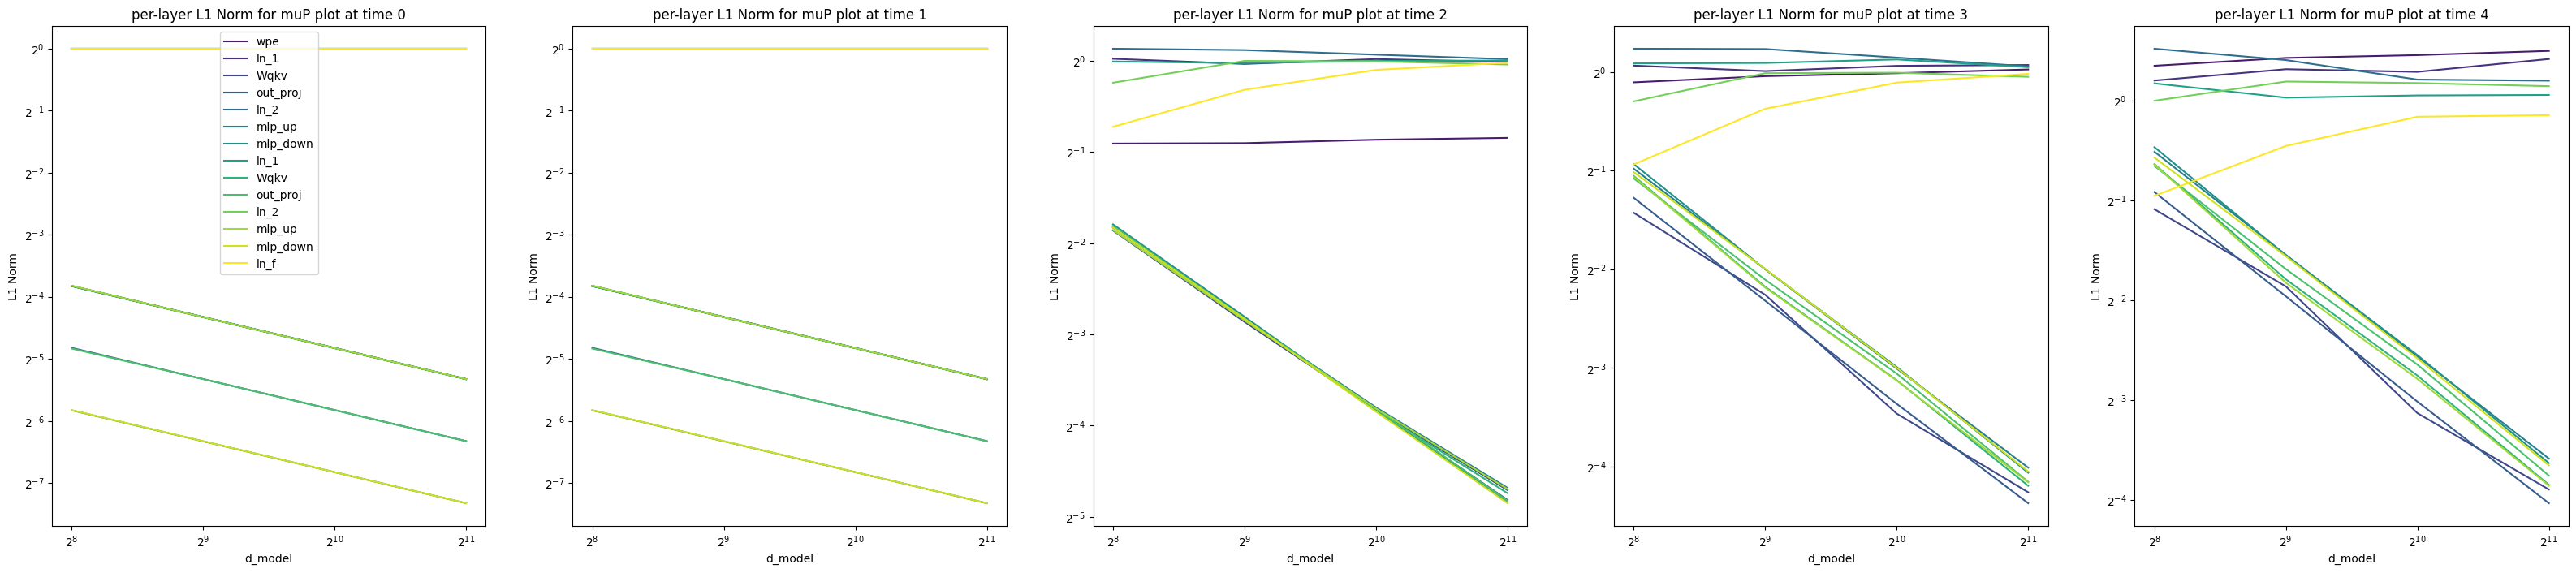

In [63]:
plot_function("/root/small_2_layers_mup_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for muP plot at time {}")

Axes(0.125,0.11;0.133621x0.77)
defaultdict(<class 'list'>, {'l1_norm/param/module.model.transformer.wte.weight': [0.07051803171634674, 0.049865540117025375, 0.03526659682393074, 0.024933917447924614], 'l1_norm/param/module.model.transformer.wpe.weight': [0.07065798342227936, 0.049885451793670654, 0.0352967232465744, 0.0249253511428833], 'l1_norm/param/module.model.transformer.blocks.0.ln_1.weight': [1.0, 1.0, 1.0, 1.0], 'l1_norm/param/module.model.transformer.blocks.0.attn.Wqkv.weight': [0.07051042467355728, 0.04986035078763962, 0.03525702655315399, 0.024936750531196594], 'l1_norm/param/module.model.transformer.blocks.0.attn.out_proj.weight': [0.03534840792417526, 0.024950478225946426, 0.017649097368121147, 0.012473568320274353], 'l1_norm/param/module.model.transformer.blocks.0.ln_2.weight': [1.0, 1.0, 1.0, 1.0], 'l1_norm/param/module.model.transformer.blocks.0.mlp.mlp_up.weight': [0.07049338519573212, 0.049853768199682236, 0.035248398780822754, 0.02492748200893402], 'l1_norm/param/mod

/tmp/ipykernel_30290/2539536866.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap  = cm.get_cmap('viridis', len(per_layer_activations))


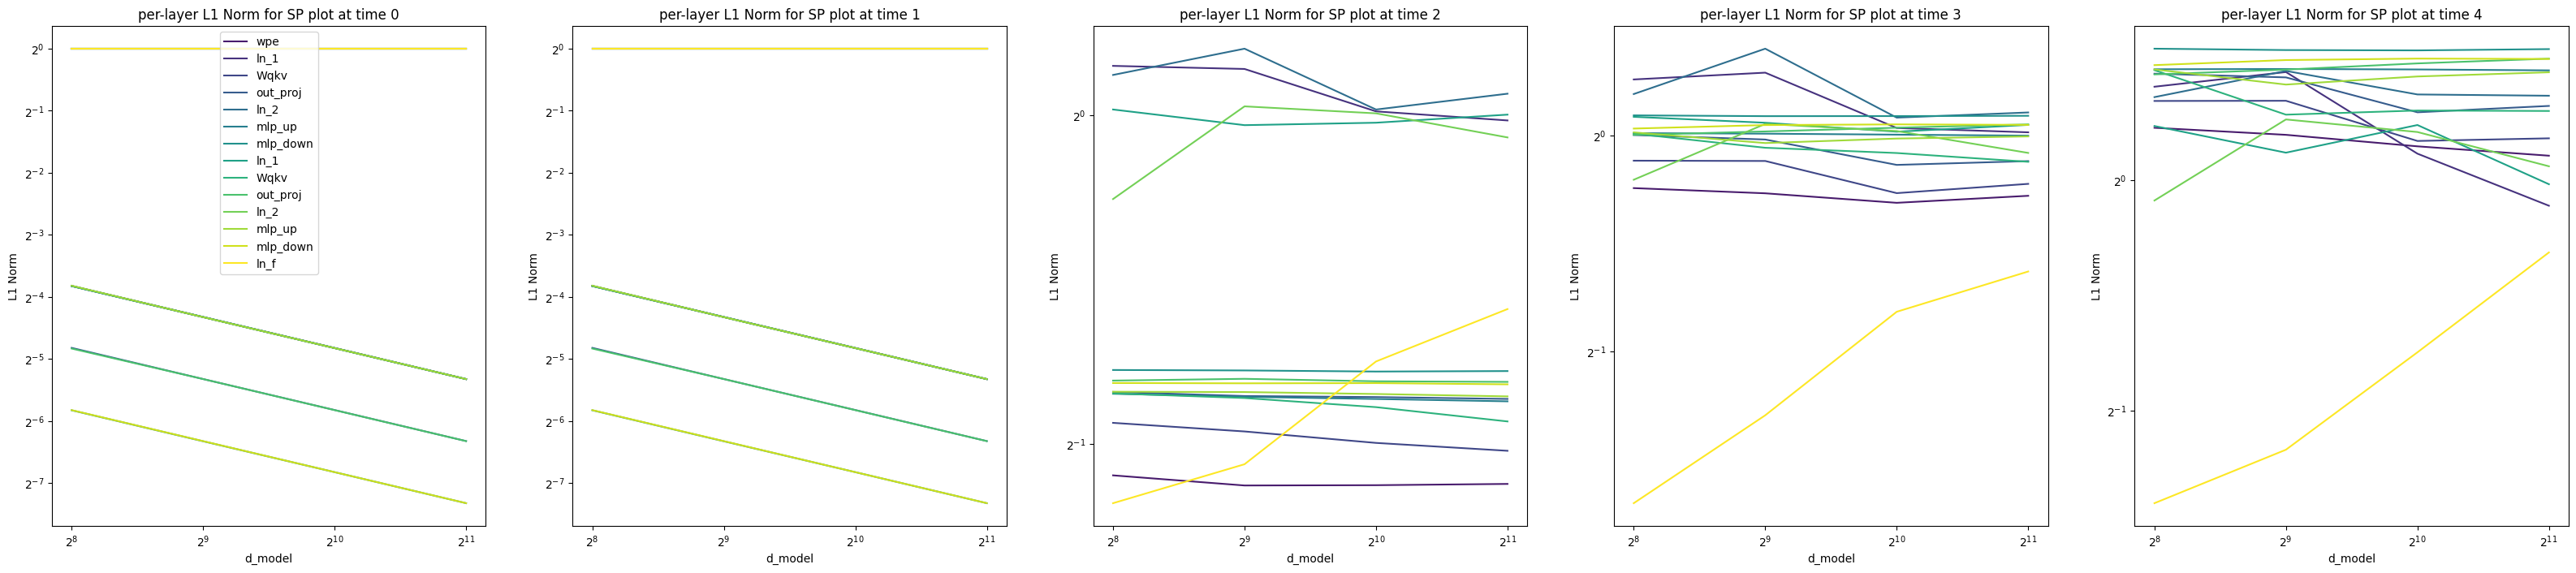

In [64]:
plot_function("/root/small_2_layers_no_mup_scaled_d_model_{}_n_head_{}", "per-layer L1 Norm for SP plot at time {}")